In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [16]:
#STEP-2: Load the Stock Market Dataset
# Example dataset: Synthetic Stock Market Data
# You may Replace this with your real dataset (e.g., from Yahoo Finance or Quandl)
data = {
    'Stock': ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'JNJ', 'V', 'PG', 'DIS', 'NFLX'],
    'Annual_Return': [30.2, 27.5, 25.0, 40.3, 50.1, 15.2, 12.3, 10.8, 22.7, 35.6],
    'Volatility': [20.5, 18.7, 21.0, 25.5, 30.2, 15.1, 14.2, 13.5, 17.0, 22.3],
    'Market_Cap': [2.5, 2.0, 1.8, 1.7, 1.0, 0.4, 0.5, 0.35, 0.3, 0.15],
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Display the dataset
print("STEP-2: Loaded Dataset")
print(df)

STEP-2: Loaded Dataset
  Stock  Annual_Return  Volatility  Market_Cap
0  AAPL           30.2        20.5        2.50
1  MSFT           27.5        18.7        2.00
2  GOOG           25.0        21.0        1.80
3  AMZN           40.3        25.5        1.70
4  TSLA           50.1        30.2        1.00
5   JNJ           15.2        15.1        0.40
6     V           12.3        14.2        0.50
7    PG           10.8        13.5        0.35
8   DIS           22.7        17.0        0.30
9  NFLX           35.6        22.3        0.15


In [17]:
# STEP-3: Preprocessing the Data
# Select numerical features for clustering
X = df[['Annual_Return', 'Volatility', 'Market_Cap']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled data
print("\nSTEP-3: Data Preprocessing Complete")
print("Scaled Data:\n", X_scaled)


STEP-3: Data Preprocessing Complete
Scaled Data:
 [[ 0.26961631  0.13971527  1.76341745]
 [ 0.04424045 -0.21955257  1.14683793]
 [-0.16444091  0.23951189  0.90020611]
 [ 1.11268898  1.13768149  0.77689021]
 [ 1.93071988  2.07576974 -0.08632113]
 [-0.98247181 -0.93808825 -0.82621657]
 [-1.22454218 -1.11772217 -0.70290066]
 [-1.34975099 -1.25743744 -0.88787452]
 [-0.35642775 -0.55886108 -0.94953248]
 [ 0.72036803  0.49898311 -1.13450633]]


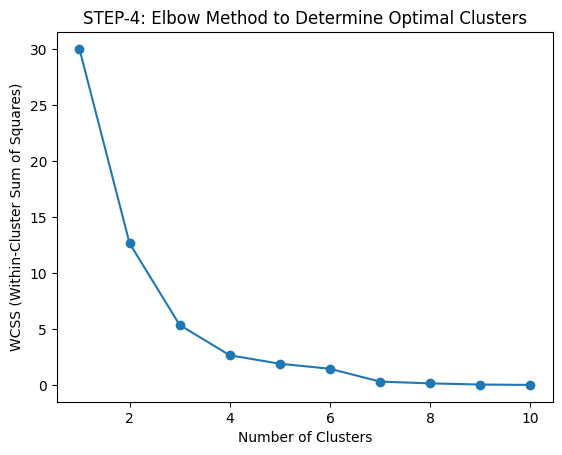


STEP-4: K-Means Clustering Complete with 3 Clusters
  Stock  Annual_Return  Volatility  Market_Cap  Cluster
0  AAPL           30.2        20.5        2.50        2
1  MSFT           27.5        18.7        2.00        2
2  GOOG           25.0        21.0        1.80        2
3  AMZN           40.3        25.5        1.70        0
4  TSLA           50.1        30.2        1.00        0
5   JNJ           15.2        15.1        0.40        1
6     V           12.3        14.2        0.50        1
7    PG           10.8        13.5        0.35        1
8   DIS           22.7        17.0        0.30        1
9  NFLX           35.6        22.3        0.15        0


In [18]:
# STEP-4: Apply K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title("STEP-4: Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

# Optimal clusters (based on elbow point, choose 3 for this example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster assignments
print(f"\nSTEP-4: K-Means Clustering Complete with {optimal_clusters} Clusters")
print(df)

In [19]:
# STEP-5: Evaluate the Clustering
# Calculate silhouette score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSTEP-5: Silhouette Score: {sil_score:.4f}")


STEP-5: Silhouette Score: 0.5361


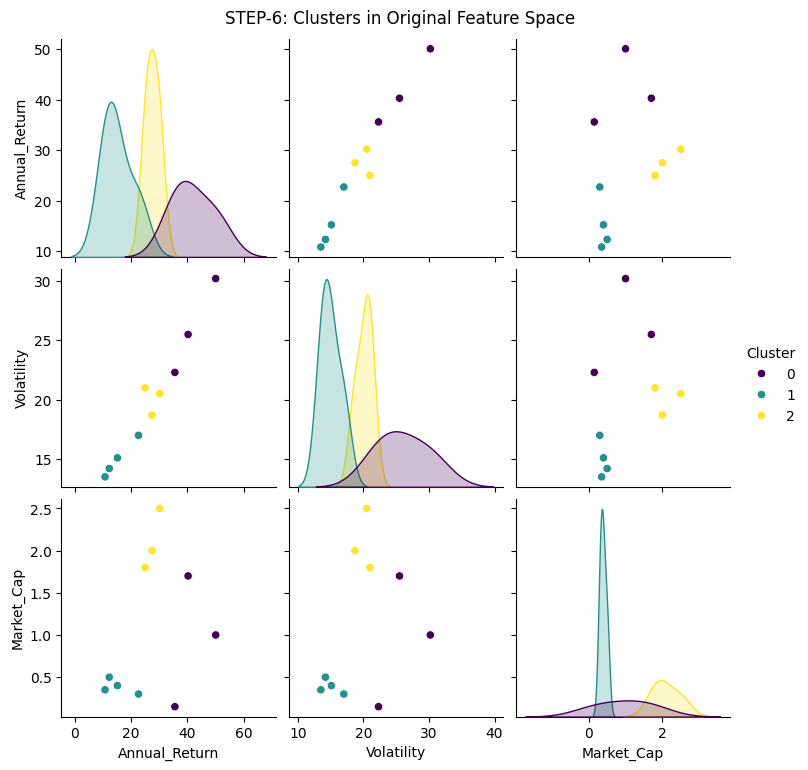

In [20]:
# STEP-6: Visualize Clusters in Original Feature Space
# Pairplot of clusters in original feature space
sns.pairplot(df, vars=['Annual_Return', 'Volatility', 'Market_Cap'], hue='Cluster', palette='viridis')
plt.suptitle("STEP-6: Clusters in Original Feature Space", y=1.02)
plt.show()

In [21]:
# STEP-7: Apply PCA for Dimensionality Reduction
# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Display explained variance ratio
print(f"\nSTEP-7: PCA Applied - Explained Variance: {pca.explained_variance_ratio_.sum():.2f}")


STEP-7: PCA Applied - Explained Variance: 0.99


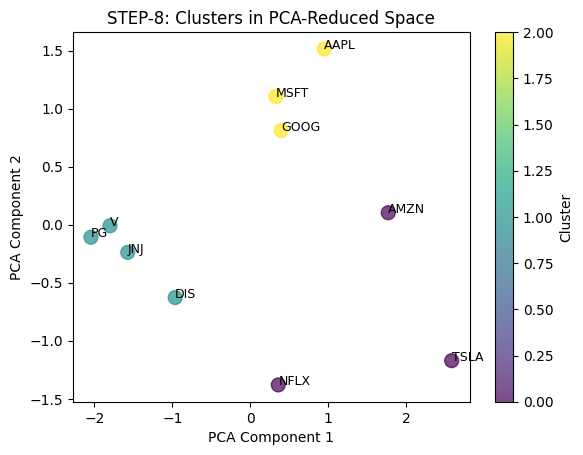

In [22]:
# STEP-8: Visualize Clusters in PCA-Reduced Space
# Scatter plot of clusters in PCA space
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7) #CMAP = plasma,inferno,magma,cividis,Greens,Blues,Purples
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['PCA1'][i], df['PCA2'][i]), fontsize=9)
plt.title("STEP-8: Clusters in PCA-Reduced Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


STEP-9: Cluster Characteristics Summary
         Annual_Return  Volatility  Market_Cap
Cluster                                       
0            42.000000   26.000000      0.9500
1            15.250000   14.950000      0.3875
2            27.566667   20.066667      2.1000


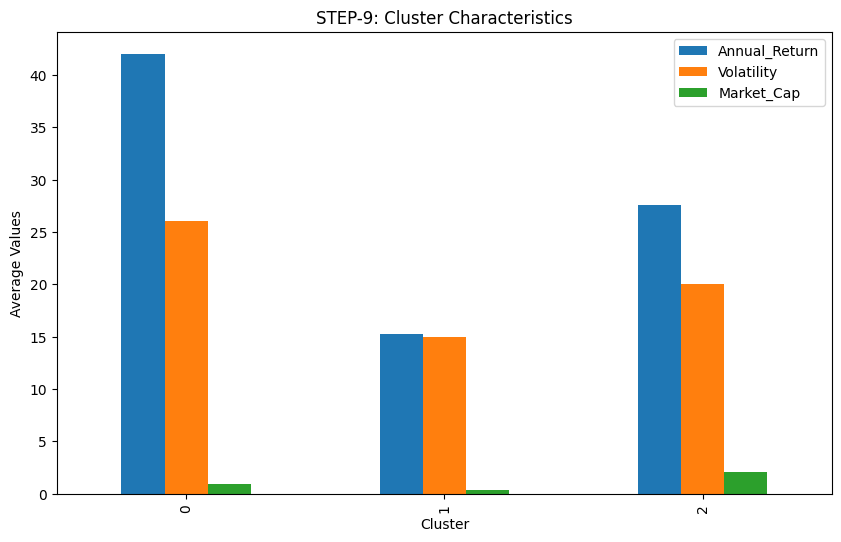

In [23]:
# STEP-9: Summarize Cluster Characteristics
# Summarize the characteristics of each cluster
# Exclude non-numeric columns before grouping
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)[['Annual_Return', 'Volatility', 'Market_Cap']]
print("\nSTEP-9: Cluster Characteristics Summary")
print(cluster_summary)

# Bar plot of cluster characteristics
cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title("STEP-9: Cluster Characteristics")
plt.xlabel("Cluster")
plt.ylabel("Average Values")
plt.legend(loc="upper right")
plt.show()